<a href="https://colab.research.google.com/github/merongedrago/Explainable_Deep_Learning/blob/main/explainable_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explainable Deep Learning by Meron Gedrago


## Part 1: setting up enviroment

In [5]:
# uncomment the following to install packages
# !pip install kagglehub
# !pip install torch
!pip install pytorch-gradcam
!pip install grad-cam

# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import torch
from torchvision.models import resnet50, ResNet50_Weights
import os
import os, random
random.seed(42)
from glob import glob
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from torchvision.models import resnet50
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

import matplotlib.pyplot as plt
# download dataset from kaggle
path = kagglehub.dataset_download("mdwaquarazam/agricultural-crops-image-classification")
agri_data = path +"/Agricultural-crops/"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=93ab92d7e0d37bd30f166b6a9a0e53d625947cb2e775db8b4388b0ec1bdb1c66
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


100%|██████████| 79.0M/79.0M [00:00<00:00, 107MB/s]

Extracting files...


In [16]:
# look at the first few labels of the datset
Crops_label = sorted(os.listdir(agri_data))
Crops_label

['Cherry',
 'Coffee-plant',
 'Cucumber',
 'Fox_nut(Makhana)',
 'Lemon',
 'Olive-tree',
 'Pearl_millet(bajra)',
 'Tobacco-plant',
 'almond',
 'banana',
 'cardamom',
 'chilli',
 'clove',
 'coconut',
 'cotton',
 'gram',
 'jowar',
 'jute',
 'maize',
 'mustard-oil',
 'papaya',
 'pineapple',
 'rice',
 'soyabean',
 'sugarcane',
 'sunflower',
 'tea',
 'tomato',
 'vigna-radiati(Mung)',
 'wheat']

## Part 2: GradCAM

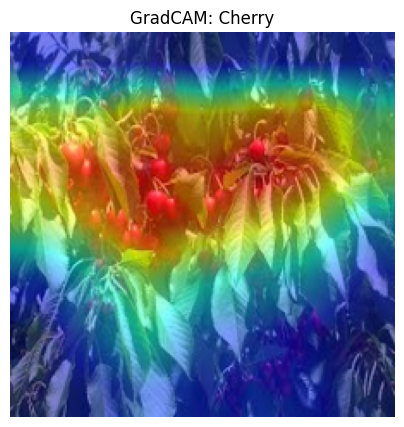

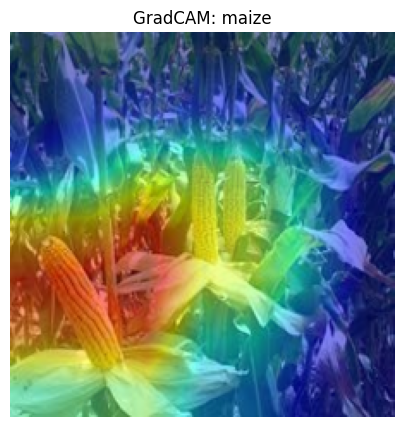

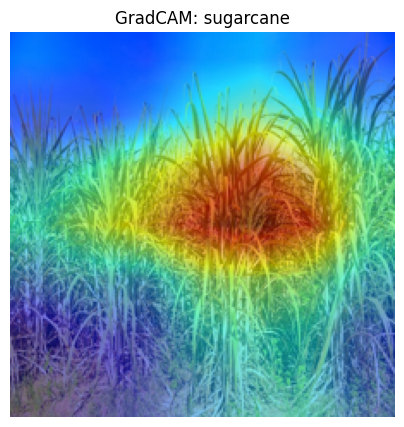

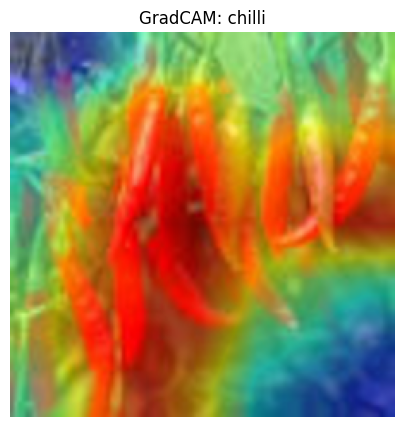

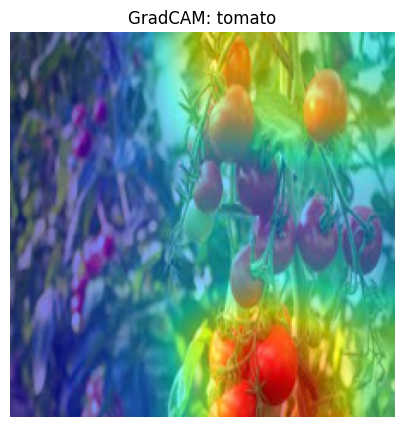

In [24]:
import time
start_time = time.time()
# get image path for pictures
image_paths = glob(os.path.join(agri_data, "*", "*.jpg"))

# choose four different crops to visualize
selected_classes = [
    "Cherry",
    "maize",
    "sugarcane",
    "chilli",
    "tomato"
]

sample_image_paths = []

for cls in selected_classes:
    cls_path = os.path.join(agri_data, cls)
    all_imgs = [os.path.join(cls_path, f) for f in os.listdir(cls_path) if f.endswith((".jpg", ".png", ".jpeg"))]
    if all_imgs:
        sample_image_paths.append(random.choice(all_imgs))

# Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load model and GradCAM - source: https://jacobgil.github.io/pytorch-gradcam-book/introduction.html
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers)

# Loop through the few selected images
for i,img_path in enumerate(sample_image_paths):
    img = Image.open(img_path).convert("RGB")
    rgb_img = np.array(img.resize((224, 224))) / 255.0
    input_tensor = transform(img).unsqueeze(0)

    # get prediction for each
    with torch.no_grad():
        output = model(input_tensor)
        class_idx = torch.argmax(output).item()

    # computer gradCAM
    targets = [ClassifierOutputTarget(class_idx)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    # visualization
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    plt.figure(figsize=(5, 5))
    plt.imshow(visualization)
    plt.title(f"GradCAM: {selected_classes[i]}")
    plt.axis("off")
    plt.show()

end_time = time.time()
print(f"Execution time GradCAM: {end_time - start_time} seconds")

*The above code snippet was generated using ChatGPT 5oon 10/05/25 at 3:30 pm, specifically to preprocess the image for the five classes*

## Part 3: AblationCAM

100%|██████████| 64/64 [05:28<00:00,  5.13s/it]


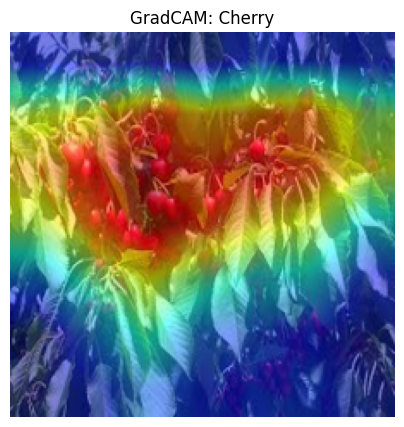

100%|██████████| 64/64 [05:44<00:00,  5.38s/it]


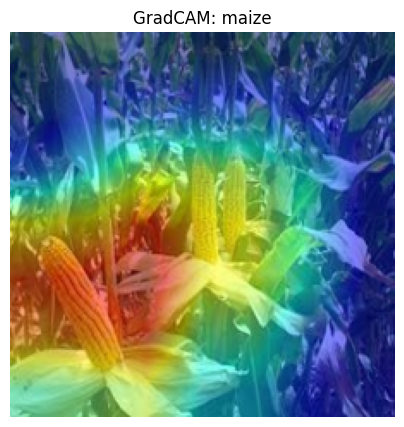

100%|██████████| 64/64 [05:32<00:00,  5.19s/it]


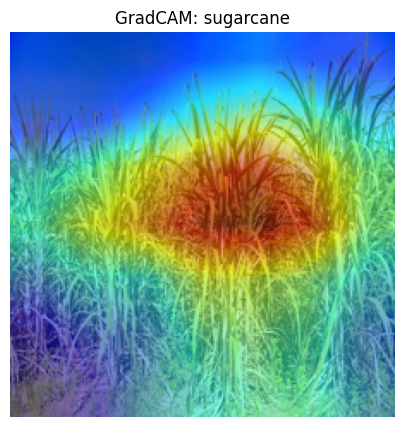

100%|██████████| 64/64 [05:29<00:00,  5.15s/it]


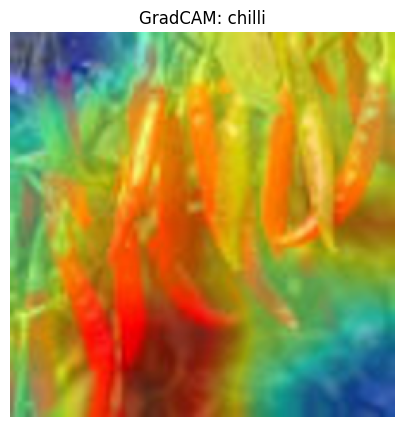

100%|██████████| 64/64 [05:24<00:00,  5.07s/it]


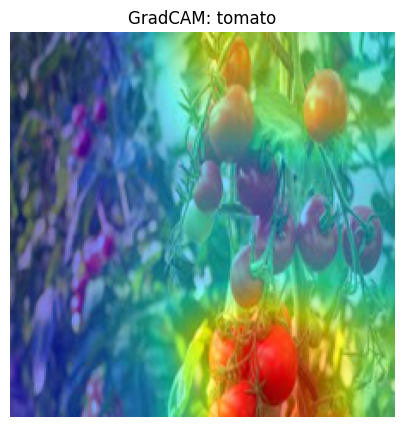

In [25]:
# try AblationCAM
start_time = time.time()
cam = AblationCAM(model=model, target_layers=target_layers)

# replicate same thing for AblationCAM
for i,img_path in enumerate(sample_image_paths):
    img = Image.open(img_path).convert("RGB")
    rgb_img = np.array(img.resize((224, 224))) / 255.0
    input_tensor = transform(img).unsqueeze(0)
    # prediction
    with torch.no_grad():
        output = model(input_tensor)
        class_idx = torch.argmax(output).item()
    # get result
    targets = [ClassifierOutputTarget(class_idx)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    # visualization
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    plt.figure(figsize=(5, 5))
    plt.imshow(visualization)
    plt.title(f"AblationCAM: {selected_classes[i]}")
    plt.axis("off")
    plt.show()

end_time = time.time()
print(f"Execution time AblationCAM: {end_time - start_time} seconds")

## Part 4: ScoreCAM

100%|██████████| 128/128 [05:29<00:00,  2.57s/it]


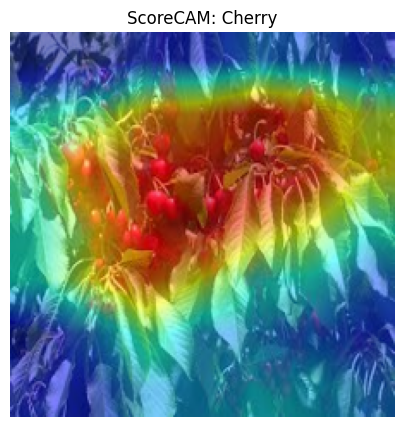

100%|██████████| 128/128 [04:47<00:00,  2.25s/it]


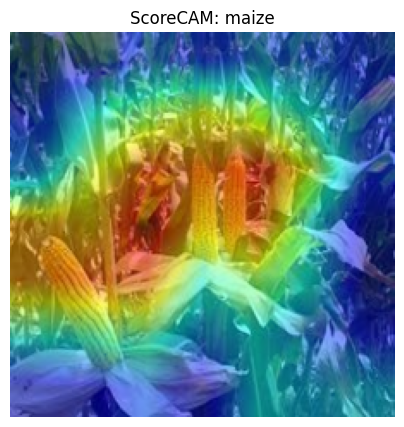

100%|██████████| 128/128 [04:10<00:00,  1.96s/it]


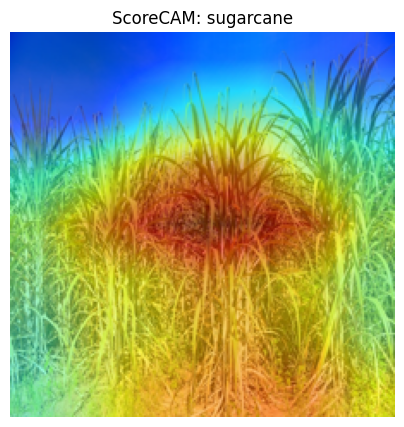

100%|██████████| 128/128 [04:44<00:00,  2.22s/it]


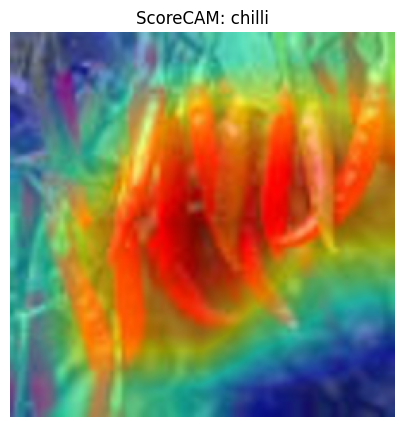

100%|██████████| 128/128 [04:13<00:00,  1.98s/it]


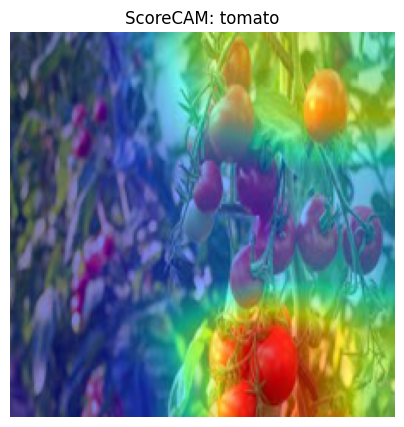

In [26]:
# try scoreCAM
start_time = time.time()
cam = ScoreCAM(model=model, target_layers=target_layers)

# replicate same thing for score CAM
for i,img_path in enumerate(sample_image_paths):
    img = Image.open(img_path).convert("RGB")
    rgb_img = np.array(img.resize((224, 224))) / 255.0
    input_tensor = transform(img).unsqueeze(0)

    # get prediction
    with torch.no_grad():
        output = model(input_tensor)
        class_idx = torch.argmax(output).item()

    # compute scoreCAM
    targets = [ClassifierOutputTarget(class_idx)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    # visualization
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    plt.figure(figsize=(5, 5))
    plt.imshow(visualization)
    plt.title(f"ScoreCAM: {selected_classes[i]}")
    plt.axis("off")
    plt.show()
end_time = time.time()
print(f"Execution time ScoreCAM: {end_time - start_time} seconds")

## Part 5: Comparison and observation

For this exercise, I chose to visualize five images from a dataset of agricultural crops. I was interested in exploring what features excite or are most relevant for identifying different types of crops using a pre-trained ResNet-50 model and three different explainable deep learning methods: GradCAM, AblationCAM, and ScoreCAM.

After reviewing the results, I had the following reflections:

- Comparison of methods: The highlighted areas for each of the images (Cherry, Maize, Sugarcane, Chilli, and Tomato) were very similar, as each method emphasized roughly the same regions of the plants. However, the computation time differed as AblationCAM and ScoreCAM took noticeably longer to produce results compared to GradCAM.

- Focus areas: For most crops, the fruits were the primary regions highlighted, while fruits in the background or partially obscured were not used for identification. For example, in the tomato image, nearby tomatoes were identified, whereas those farther away were not.

- Leaves and stems: The leaves or stems were generally not emphasized in the visualizations, except for the sugarcane image, where the stem appeared to contribute to the model’s classification.